# NBA All-Start Prediction

In [32]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

## Loading data
### 24 all-star players and 24 normal players are randomly selected as training and testing data
### Dataset includes their PER, Win%, and all-star status (1:all-star, 0: normal)
### PER: Player efficiency rating (PER) is a rating of a player's per-minute productivity
### Win%: The winning percentage of the player's team at that season

In [33]:
# data set for 2019-2020 all-star players
# [PER, Win%, all-star status]

star = []
star =  [[ 20.0 , 0.667 , 1 ], [ 23.9 , 0.299 , 1]]
star.append([ 31.9 , 0.767 , 1])
star.append([ 17.9 , 0.736 , 1 ])
star.append([ 25.8 , 0.589 , 1 ])
star.append([ 17.1 , 0.736 , 1 ])
star.append([ 20.4 , 0.589 , 1 ])
star.append([ 23.6 , 0.603 , 1])
star.append([ 21.1 , 0.767 , 1 ])
star.append([ 20.3 , 0.603 , 1 ])
star.append([ 20.4 , 0.667 , 1 ])
star.append([ 20.7 , 0.616 , 1 ])
star.append([ 29.1 , 0.611 , 1 ])
star.append([ 27.6 , 0.573 , 1 ])
star.append([ 25.5 , 0.732 , 1])
star.append([ 25.5 , 0.732 , 1])
star.append([ 26.9 , 0.681 , 1])
star.append([ 27.4 , 0.732 , 1])
star.append([ 21.7 , 0.611 , 1])
star.append([ 21.0 , 0.611 , 1])
star.append([ 26.9 , 0.473 , 1])
star.append([ 18.8 , 0.611 , 1])
star.append([ 18.8 , 0.417 , 1])
star.append([ 24.9 , 0.630 , 1])

# data set for 2019-2020 non all-star players

normal = []
normal =  [[ 26.5 , 0.297 , 0 ], [ 23.2 , 0.347 , 0]]
normal.append([ 21.0 , 0.303 , 0])
normal.append([ 19.5 , 0.611 , 0 ])
normal.append([ 18.4 , 0.616 , 0 ])
normal.append([ 17.9 , 0.292 , 0 ])
normal.append([ 17.4 , 0.464 , 0 ])
normal.append([ 16 , 0.318 , 0 ])
normal.append([ 15.6 , 0.611 , 0 ])
normal.append([ 14.1 , 0.611 , 0 ])
normal.append([ 14.3 , 0.452 , 0 ])
normal.append([ 13.3 , 0.486 , 0 ])
normal.append([ 13.1 , 0.417 , 0 ])
normal.append([ 12.6 , 0.611 , 0 ])
normal.append([ 14.5 , 0.573 , 0])
normal.append([ 14.0 , 0.452 , 0])
normal.append([ 13.3 , 0.736 , 0])
normal.append([ 7.2 , 0.231 , 0])
normal.append([ 10.7 , 0.318 , 0])
normal.append([ 15.7 , 0.589 , 0])
normal.append([ 12.9 , 0.603 , 0])
normal.append([ 11.9 , 0.417 , 0])
normal.append([ 12.2 , 0.732 , 0])
normal.append([ 16.9 , 0.667 , 0])

print('start list=',len(star))
print('normal list=',len(normal))


start list= 24
normal list= 24


In [42]:
star = np.array(star)
normal = np.array(normal)
data = np.concatenate((star, normal))


## Split data set to train and test

In [43]:
train, test = train_test_split(data, test_size=0.25, random_state = 4, shuffle=True)
print('train set=', train)
print('test set=', test)

train set= [[14.1    0.611  0.   ]
 [25.5    0.732  1.   ]
 [26.9    0.681  1.   ]
 [19.5    0.611  0.   ]
 [12.6    0.611  0.   ]
 [26.9    0.473  1.   ]
 [26.5    0.297  0.   ]
 [11.9    0.417  0.   ]
 [27.6    0.573  1.   ]
 [20.4    0.667  1.   ]
 [21.     0.611  1.   ]
 [17.9    0.292  0.   ]
 [14.5    0.573  0.   ]
 [15.7    0.589  0.   ]
 [21.     0.303  0.   ]
 [15.6    0.611  0.   ]
 [27.4    0.732  1.   ]
 [10.7    0.318  0.   ]
 [14.3    0.452  0.   ]
 [25.5    0.732  1.   ]
 [31.9    0.767  1.   ]
 [ 7.2    0.231  0.   ]
 [13.3    0.486  0.   ]
 [18.8    0.611  1.   ]
 [20.     0.667  1.   ]
 [17.9    0.736  1.   ]
 [13.1    0.417  0.   ]
 [17.4    0.464  0.   ]
 [14.     0.452  0.   ]
 [20.3    0.603  1.   ]
 [21.1    0.767  1.   ]
 [24.9    0.63   1.   ]
 [13.3    0.736  0.   ]
 [23.9    0.299  1.   ]
 [17.1    0.736  1.   ]
 [12.2    0.732  0.   ]]
test set= [[20.4    0.589  1.   ]
 [16.9    0.667  0.   ]
 [20.7    0.616  1.   ]
 [25.8    0.589  1.   ]
 [29.1    0.611  1

In [44]:
#x_train
x_p = train[:,0].reshape(-1, 1) 
x_w = train[:,1].reshape(-1, 1) 
#y_train
y = train[:,2]               
print('x(per)=',x_p)
print('x(win%)=',x_w)
print('y=',y)

x(per)= [[14.1]
 [25.5]
 [26.9]
 [19.5]
 [12.6]
 [26.9]
 [26.5]
 [11.9]
 [27.6]
 [20.4]
 [21. ]
 [17.9]
 [14.5]
 [15.7]
 [21. ]
 [15.6]
 [27.4]
 [10.7]
 [14.3]
 [25.5]
 [31.9]
 [ 7.2]
 [13.3]
 [18.8]
 [20. ]
 [17.9]
 [13.1]
 [17.4]
 [14. ]
 [20.3]
 [21.1]
 [24.9]
 [13.3]
 [23.9]
 [17.1]
 [12.2]]
x(win%)= [[0.611]
 [0.732]
 [0.681]
 [0.611]
 [0.611]
 [0.473]
 [0.297]
 [0.417]
 [0.573]
 [0.667]
 [0.611]
 [0.292]
 [0.573]
 [0.589]
 [0.303]
 [0.611]
 [0.732]
 [0.318]
 [0.452]
 [0.732]
 [0.767]
 [0.231]
 [0.486]
 [0.611]
 [0.667]
 [0.736]
 [0.417]
 [0.464]
 [0.452]
 [0.603]
 [0.767]
 [0.63 ]
 [0.736]
 [0.299]
 [0.736]
 [0.732]]
y= [0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0.]


# Logistic regression (PER vs all-star) 

In [45]:
model = LogisticRegression(solver='liblinear')
model.fit(x_p, y)


LogisticRegression(solver='liblinear')

In [46]:
predictions = model.predict(x_p)
predictions

array([0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0.])

In [47]:
# x_test
xt = test[:, 0]
xt = xt.reshape(-1,1)
xt
# y_test
yt = test[:, 2]

tp = model.predict(xt)
print('true value=', yt)
print('prediction value=',tp)


true value= [1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0.]
prediction value= [1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.]


## model assessment

In [48]:
# train set score

model.score(x_p, y) 

0.8611111111111112

In [10]:
# test set score
model.score(xt, yt)

0.8333333333333334

In [11]:

model.coef_

array([[0.12224071]])

In [12]:
model.intercept_

array([-2.16407498])

In [13]:
def log_reg_model_cpredict(x):
    return 1 / (1 + np.exp(-(model.intercept_ + model.coef_ * x)))


In [14]:
L=model.predict_proba(x_p)
L

array([[0.60837364, 0.39162636],
       [0.27826923, 0.72173077],
       [0.24523305, 0.75476695],
       [0.44531492, 0.55468508],
       [0.65109186, 0.34890814],
       [0.24523305, 0.75476695],
       [0.25439576, 0.74560424],
       [0.6702709 , 0.3297291 ],
       [0.22974201, 0.77025799],
       [0.41832933, 0.58167067],
       [0.4005966 , 0.5994034 ],
       [0.49399187, 0.50600813],
       [0.59666413, 0.40333587],
       [0.56091981, 0.43908019],
       [0.4005966 , 0.5994034 ],
       [0.56392818, 0.43607182],
       [0.23409692, 0.76590308],
       [0.70184507, 0.29815493],
       [0.60253356, 0.39746644],
       [0.27826923, 0.72173077],
       [0.14989771, 0.85010229],
       [0.78312003, 0.21687997],
       [0.63141072, 0.36858928],
       [0.46653751, 0.53346249],
       [0.43027257, 0.56972743],
       [0.49399187, 0.50600813],
       [0.63708206, 0.36291794],
       [0.50927061, 0.49072939],
       [0.6112822 , 0.3887178 ],
       [0.42130674, 0.57869326],
       [0.

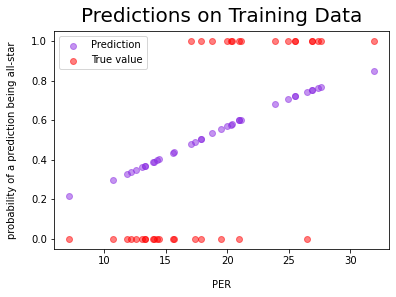

In [15]:
plt.figure()
plt.scatter(x=x_p, y=log_reg_model_cpredict(x_p), c='blueviolet', alpha=0.5, label = 'Prediction')
plt.scatter(x=x_p, y=y, c='red', alpha=0.5, label = 'True value')
plt.title("Predictions on Training Data", y=1.015, fontsize=20)
plt.legend()
plt.xlabel("PER", labelpad=14)
plt.ylabel("probability of a prediction being all-star", labelpad=14);

# Logistic regression (Win% vs all-start)

In [16]:
model = LogisticRegression(solver='liblinear')
model.fit(x_w, y)

LogisticRegression(solver='liblinear')

In [17]:
predictions = model.predict(x_w)
predictions

array([0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1.])

In [18]:
# x_test
xt = test[:, 0]
xt = xt.reshape(-1,1)
xt
# y_test
yt = test[:, 2]

tp = model.predict(xt)
print('true value=', yt)
print('prediction value=',tp)

true value= [1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0.]
prediction value= [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## model assessment

In [19]:
# train set score

model.score(x_w, y) 

0.7777777777777778

In [20]:
# test set score
model.score(xt, yt)

0.5833333333333334

In [21]:
model.coef_

array([[0.93881382]])

In [22]:
model.intercept_

array([-0.57494002])

In [23]:
def log_reg_model_cpredict(x):
    return 1 / (1 + np.exp(-(model.intercept_ + model.coef_ * x)))

In [24]:
L=model.predict_proba(x_w)
L

array([[0.50033119, 0.49966881],
       [0.47196152, 0.52803848],
       [0.48390751, 0.51609249],
       [0.50033119, 0.49966881],
       [0.50033119, 0.49966881],
       [0.53267364, 0.46732636],
       [0.57349187, 0.42650813],
       [0.54573546, 0.45426454],
       [0.50924887, 0.49075113],
       [0.4871906 , 0.5128094 ],
       [0.50033119, 0.49966881],
       [0.57463963, 0.42536037],
       [0.50924887, 0.49075113],
       [0.50549445, 0.49450555],
       [0.5721135 , 0.4278865 ],
       [0.50033119, 0.49966881],
       [0.47196152, 0.52803848],
       [0.56866273, 0.43133727],
       [0.53757805, 0.46242195],
       [0.47196152, 0.52803848],
       [0.46378101, 0.53621899],
       [0.58857413, 0.41142587],
       [0.52963435, 0.47036565],
       [0.50033119, 0.49966881],
       [0.4871906 , 0.5128094 ],
       [0.47102576, 0.52897424],
       [0.54573546, 0.45426454],
       [0.53477636, 0.46522364],
       [0.53757805, 0.46242195],
       [0.50220881, 0.49779119],
       [0.

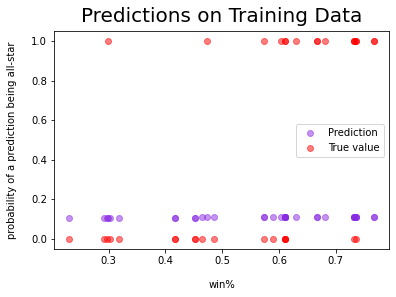

In [49]:
plt.figure()
plt.scatter(x=x_w, y=log_reg_model_cpredict(x_w), c='blueviolet', alpha=0.5, label = 'Prediction')
plt.scatter(x=x_w, y=y, c='red', alpha=0.5, label = 'True value')
plt.title("Predictions on Training Data", y=1.015, fontsize=20)
plt.legend()
plt.xlabel("win%", labelpad=14)
plt.ylabel("probability of a prediction being all-star", labelpad=14);

# logistic regression (PER, Win% vs. All-star)

In [26]:
candidates = {'PER': data[:,0],
              'Win%': data[:,1],
              'All-star': data[:,2],

              }

df = pd.DataFrame(candidates,columns= ['PER', 'Win%','All-star'])



X = df[['PER', 'Win%']]
Y = df['All-star']

X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=6,  shuffle=True)


logistic_regression= LogisticRegression(solver='liblinear', random_state=0)
logistic_regression.fit(X_train,Y_train)
Y_pred=logistic_regression.predict(X_test)
Y_Train_pred=logistic_regression.predict(X_train)

print('true value=', Y_test)
print('prediction value=',Y_pred)


true value= 47    0.0
39    0.0
37    0.0
23    1.0
7     1.0
0     1.0
6     1.0
32    0.0
14    1.0
30    0.0
46    0.0
24    0.0
Name: All-star, dtype: float64
prediction value= [1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1.]


## model assessment

Accuracy:  0.8611111111111112


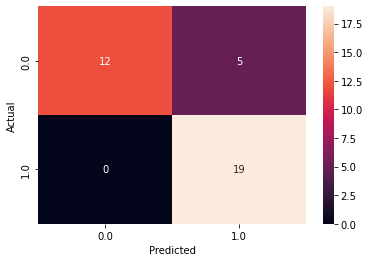

In [27]:
# train set

confusion_matrix = pd.crosstab(Y_train, Y_Train_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ', metrics.accuracy_score(Y_train, Y_Train_pred))
plt.show()

Accuracy:  0.75


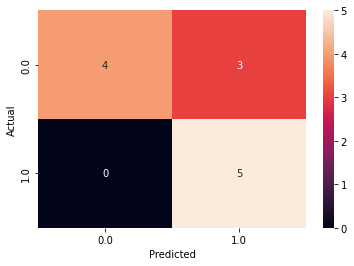

In [28]:
# test set
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ', metrics.accuracy_score(Y_test, Y_pred))
plt.show()

In [29]:
logistic_regression.coef_


array([[ 0.12862405, -0.06033526]])

In [30]:
logistic_regression.intercept_

array([-2.0754746])

C:\Users\vince\anaconda3\envs\Python3-7_Keras_env\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\vince\anaconda3\envs\Python3-7_Keras_env\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


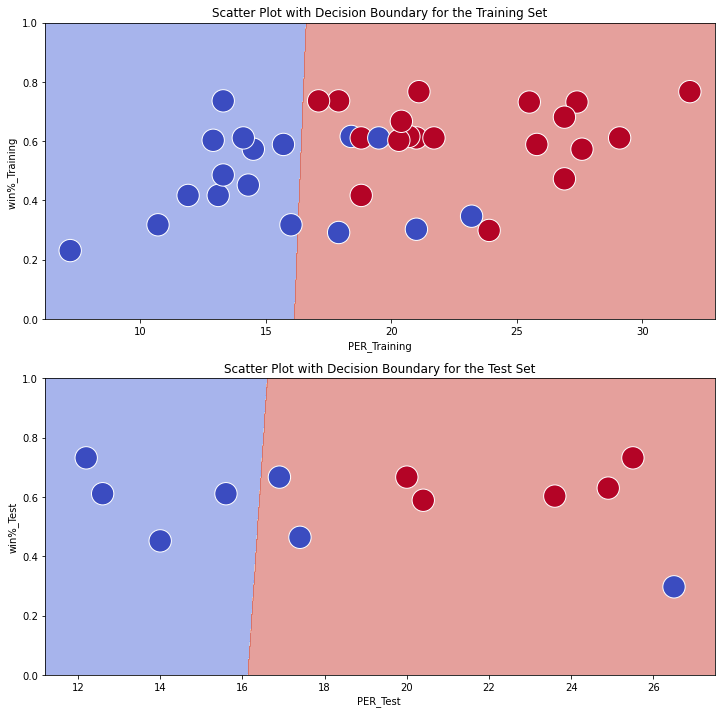

In [31]:
x_min, x_max = X_train['PER'].min() - 1, X_train['PER'].max() + 1
y_min, y_max = 0,  1.01


xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.01),
                                 np.arange(y_min, y_max, 0.01))

Z_train = logistic_regression.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = X_test['PER'].min() - 1, X_test['PER'].max() + 1
y_min, y_max = 0,  1.01

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.01),
                               np.arange(y_min, y_max, 0.01))

Z_test =  logistic_regression.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)



plt.figure(figsize = (12, 12))
plt.subplot(2, 1, 1)
plt.contourf(xx_train, yy_train, Z_train, cmap=plt.cm.coolwarm, alpha = 0.5)
plt.scatter(X_train['PER'], X_train['Win%'], c = Y_train, cmap=plt.cm.coolwarm, s = 500, edgecolor = 'w' )
plt.xlabel('PER_Training')
plt.ylabel('win%_Training ')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.subplot(2, 1, 2)
plt.contourf(xx_test, yy_test, Z_test, cmap=plt.cm.coolwarm, alpha = 0.5)
plt.scatter(X_test['PER'], X_test['Win%'], c = Y_test, cmap=plt.cm.coolwarm, s = 500, edgecolor = 'w')
plt.xlabel('PER_Test ')
plt.ylabel('win%_Test')
plt.title('Scatter Plot with Decision Boundary for the Test Set')

plt.show()
